<a href="https://colab.research.google.com/github/bderdz/music_mental_health/blob/main/music_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analiza zbioru danych Music & Mental Health Survey

Dataset: [Music & Mental Health Survey Results](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from google.colab import drive

%matplotlib inline

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/big_data/mxmh_survey_results.csv')

df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


# Czyszczenie zbioru danych

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

Kolumny **Timestamp** i **Permissions** nie wpływają na analizę ponieważ to zwykła formalność więc można je usunąć

In [4]:
df.drop(columns=['Timestamp', 'Permissions'], inplace=True)

In [5]:
df.dtypes

,0
Age,float64
Primary streaming service,object
Hours per day,float64
While working,object
Instrumentalist,object
Composer,object
Fav genre,object
Exploratory,object
Foreign languages,object
BPM,float64


* Takie kolumny jak **Age** i **BPM** mają typ **float64** ale powinny być raczej **int64** ( *ale najpierw musiałbym pozbyć się braków danych* )
* Jak też można zauważyć większość kolumn ma typ **String** który zamieniam na **Categorical**


---


*Aby nie powtarzać kodu wybiore indeksy kolumn mających typ* **object** *i zamienię je na kolumny z zastosowaniem na nich funkcji zmieniającej typ na* **category**

In [6]:
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').apply(lambda col : col.astype("category"))

## Brakujące dane

In [7]:
df.isna().mean() * 100

,0
Age,0.135870
Primary streaming service,0.135870
Hours per day,0.000000
While working,0.407609
Instrumentalist,0.543478
Composer,0.135870
Fav genre,0.000000
Exploratory,0.000000
Foreign languages,0.543478
BPM,14.538043


Jak widać mamy:
* Age < 1%
* Primary streaming service	< 1%
* While working	< 1%
* Instrumentalist	< 1%
* Composer	< 1%
* Foreign languages	< 1%
* BPM ~ 14%
* Music effects ~ 1%

In [8]:
df_backup = df.copy()

In [9]:
df['Age'].isna().sum()

np.int64(1)

**Age** - Usuwam rekordy z brakującym wiekiem ponieważ wartości brakuje tylko w 1 rekordzie a jest ona dla nas ważna w analizie

In [10]:
df.dropna(subset=['Age'], inplace=True)

In [11]:
df.groupby('Primary streaming service')['Primary streaming service'].count()

<ipython-input-11-70b158508441>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Primary streaming service')['Primary streaming service'].count()


,Primary streaming service
Primary streaming service,
Apple Music,51
I do not use a streaming service.,71
Other streaming service,50
Pandora,11
Spotify,457
YouTube Music,94


**Primary streaming service** - wypełnię braki wartością Spotify ponieważ jest on najczęściej wybieraną platformą

In [12]:
df['Primary streaming service'] = df['Primary streaming service'].fillna('Spotify')

**While working** - wypełniam wartością **Yes** ponieważ występuje najczęściej i jest bardziej realistyczna dla wielu osób

In [13]:
df['While working'].mode()[0]

'Yes'

In [14]:
df['While working'] = df['While working'].fillna('Yes')

In [15]:
df.groupby(['Instrumentalist', 'Composer'])['Composer'].count()

<ipython-input-15-eed88122879e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Instrumentalist', 'Composer'])['Composer'].count()


Instrumentalist  Composer
No               No          463
                 Yes          33
Yes              No          143
                 Yes          92
Name: Composer, dtype: int64

**Instrumentalist, Composer** - wypełnię wartością **No** ze względu na to że częsciej osoba nie robi własnej muzyki i nie gra na instrumentach

In [16]:
df['Composer'] = df['Composer'].fillna('No')
df['Instrumentalist'] = df['Instrumentalist'].fillna('No')

**Foreign languages** - zostanie wypełnione metodą **Backward fill**

In [17]:
df['Foreign languages'] = df['Foreign languages'].bfill()
df['Foreign languages'].isna().sum()

np.int64(0)

**BPM** - ze względu na duży procent spróbuje wypełnić metodą interpolacji najbliższych wartości

In [18]:
df['BPM'] = df['BPM'].interpolate(method='nearest')
df['BPM'].isna().sum()

np.int64(0)

**Music effects** - aby nie tracić na ilości rekordów możemy uznać że brakujące wartości to **Brak efektu (No effect)**

In [19]:
df['Music effects'] = df['Music effects'].fillna('No effect')

In [20]:
df.isna().mean() * 100

,0
Age,0.0
Primary streaming service,0.0
Hours per day,0.0
While working,0.0
Instrumentalist,0.0
Composer,0.0
Fav genre,0.0
Exploratory,0.0
Foreign languages,0.0
BPM,0.0


Teraz nie mając brakujących wartości można zamienić typ danych w kolumnach **Age** i **BPM**

In [21]:
df['Age'] = df['Age'].astype('int64')
df['BPM'] = df['BPM'].astype('int64')

## Wartości odstające
Mamy wartości odstające  w kolumnie **BPM** więc użyję metody **IQR-based Outlier Detection**

In [22]:
bpm_box = px.box(
    df,
    y="BPM",
    width=500,
    height=400)

print(f'Średnia wartość BPM: {df["BPM"].mean()}')
bpm_box.show()

Średnia wartość BPM: 1360668.0353741497


In [23]:
def remove_outlier(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)

  IQR = Q3 - Q1
  max_value = Q3 + 1.5 * IQR
  min_value = Q1 - 1.5 * IQR

  return column.apply(lambda v: min_value if v < min_value else max_value if v > max_value else v)

In [24]:
df['BPM'] = remove_outlier(df['BPM'])

df['BPM'] = df['BPM'].astype('int64') #kastuje na int ponieważ nie potrzebujemy zmiennoprzycinowej liczby do BPM

In [25]:
bpm_box = px.box(
    df,
    y="BPM",
    width=500,
    height=400)

print(f'Średnia wartość BPM: {df["BPM"].mean()}')
bpm_box.show()

Średnia wartość BPM: 123.71156462585034


Patrząc na **maksymalną** wartość z kolumny **Hours per day** można wątpić w to że ktokolwiek mógłby tyle słuchać muzyki więc uważam że tak samo jak z **BPM** powinniśmy **zastosować metodę opartą na IQR i wyrównać wartości**

In [26]:
hours_box = px.box(
    df,
    y="Hours per day",
    width=500,
    height=400)

hours_box.show()

In [27]:
df['Hours per day'] = remove_outlier(df['Hours per day'])

df['Hours per day'].describe()

,Hours per day
count,735.000000
mean,3.407551
std,2.409480
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,9.500000


## Koniec czyszczenia
Końcowy efekt:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           735 non-null    int64   
 1   Primary streaming service     735 non-null    category
 2   Hours per day                 735 non-null    float64 
 3   While working                 735 non-null    category
 4   Instrumentalist               735 non-null    category
 5   Composer                      735 non-null    category
 6   Fav genre                     735 non-null    category
 7   Exploratory                   735 non-null    category
 8   Foreign languages             735 non-null    category
 9   BPM                           735 non-null    int64   
 10  Frequency [Classical]         735 non-null    category
 11  Frequency [Country]           735 non-null    category
 12  Frequency [EDM]               735 non-null    category


# EDA

## Ogólna charakterystyka osób
Zacznę analizę zbioru danych od ogólnych cech ankietowanych osób

### Wiek
Zdecydowana większość to młodzież w **wieku 15-25lat**

Średni czas słuchania muzyki dziennie jest w przedziale od **1 do 5 godzin**

**Czas słuchania muzyki maleje wraz z wiekiem** aczkolwiek najwiecej czasu słuchając muzyki spędzają osoby w wieku podeszłym (80-85lat)

In [29]:
age_hist = px.histogram(df, x='Age', nbins=20)

age_charts = make_subplots(rows=2, cols=2, subplot_titles=['Age', 'Hours per day', 'Hours per day by Age'])

age_charts.add_trace(go.Histogram(x=df['Age'], name='Age', nbinsx=20),row=1,col=1)
age_charts.add_trace(go.Histogram(x=df['Hours per day'], name='Hours per day', nbinsx=10, ),row=1,col=2)

age_charts.add_trace(go.Histogram(x=df['Age'], y=df['Hours per day'], name='age vs hours', histfunc='avg', nbinsx=20),row=2,col=1)
age_charts.update_xaxes(title_text="Age", row=2, col=1)
age_charts.update_yaxes(title_text="Mean listen time", row=2, col=1)

age_charts.update_layout(
    showlegend=False,
    height = 650,
    width = 800
)

age_charts.show()

### Cechy
Z wykresów wynika że **większość osób nie zajmuje się muzyką** a tylko słuchają jej

**Znacząca ilość osób słucha muzyki podczas pracy i ciągle szuka nowych gatunków muzyki, często w języku obcym**


In [30]:
person_info = df[['Instrumentalist','Composer','While working', 'Exploratory', 'Foreign languages']]

figure = make_subplots(rows=2, cols=3, subplot_titles=person_info.columns)

for i, col_name in enumerate(person_info.columns):
  row = i // 3 + 1
  column = i % 3 + 1
  figure.add_trace(
    go.Histogram(x=person_info[col_name],name=col_name),
    row=row, col=column)

figure.update_layout(
    title='Histogram cech',
    showlegend=False,
    height=600,
    width=800
)

## Muzyka


### Serwisy streamingowe
Oczekiwanie **Spotify dominuje** wśród wybieranych serwisów do słuchania muzyki

*Co ciekawie więcej osób nie używa żadnego serwisu niż używa Apple music*

**Średni wiek użytkownika Spotify to 23lata a po 30stce wybirają niszowe serwisy albo wcale ich nie używają**

In [31]:
streaming_services = df['Primary streaming service'].value_counts().reset_index()
streaming_services.columns = ['service', 'count']

services_pie = px.pie(
    streaming_services,
    values='count',
    names='service',
    title='Popularność serwisów streamingowych',
    hole=0.2,
    height=400,
    width=600)

age_services_hist = px.histogram(
    df,
    x='Primary streaming service',
    y='Age',
    histfunc='avg',
    title='Statystyka używania serwisów streamingowych oparta o wiek',
    height=500,
    width=600)

age_services_hist.update_layout(
    yaxis=dict(
        tickformat='d'
    )
)

services_pie.show()
age_services_hist.show()

### Gatunki muzyczne

Wśród najpopularniejszych gatunków **dominują Rock, Pop i Metal**

In [32]:
fav_genres = df.groupby('Fav genre', observed=True).size().reset_index(name='count')

genres_pie = px.pie(
    fav_genres,
    values='count',
    names='Fav genre',
    hole=0.2,
    title='Najpopularniejszy gatunek muzyki',
    height=500,
    width=800)

genres_pie.show()

Podział wiekowy gatunków wygląda dość normalnie

Najstarsza (89lat) osoba ankietowana słucha Rap-u (XD) a najmłodsza (10lat) Pop-u

In [33]:
genre_age_chart = px.scatter(
    df,
    x='Fav genre',
    y='Age',
    color='Fav genre',
    title='Ulubione gatunki muzyki według wieku',
    labels={'Fav genre': '', 'Age': 'Wiek'},
    height=550,
    width=800)

genre_age_chart.update_traces(marker_size=8)
genre_age_chart.update_layout(showlegend=False)

genre_age_chart.show()

**Średni puls wzrasta wraz z intensywnością gatunku muzycznego**

In [34]:
avg_bpm = df.groupby('Fav genre', observed=True)['BPM'].mean().sort_values().reset_index()

genre_bpm_chart = px.scatter(
    avg_bpm,
    x='Fav genre',
    y='BPM',
    color='Fav genre',
    title='Średni BPM podczas słuchania poszczególnych gatunków muzyki',
    labels={'Fav genre': '', 'BPM': 'BPM'},
    height=550,
    width=800)

genre_bpm_chart.update_traces(marker_size=15)

genre_bpm_chart.update_layout(
    yaxis=dict(
        tickformat='d'
    )
)

genre_bpm_chart.show()

### Częstotliwość słuchania poszczególnych gatunków

* Prawie większość osób nigdy nie słucha muzyki **Gospel**

* **Classical i Jazz** słuchają rzadko najwięcej osób

* **Pop** jest najpopularniejszy wśród czasami słuchanych gatunków

* **Najczęściej odtwarzanym gatunkiem jest Rock**



In [35]:
freq_df = df.filter(like='Frequency', axis=1)

freq_df = freq_df.melt(var_name='genre', value_name='frequency')
freq_df['genre'] = freq_df['genre'].str.replace('Frequency [', '').str.replace(']', '')

freq_hist = px.histogram(
    freq_df,
    x='genre',
    color='frequency',
    title='Częstotliwość słuchania poszczególnych gatunków',
)

freq_hist.update_xaxes(title='')
freq_hist.update_yaxes(title='Ilość osób')
freq_hist.update_layout(barmode='group', bargap=0.35, legend_title='Częstotliwość')

freq_hist.show()

## Choroby psychiczne
**Najczęściej** występującą chorobą psychiczną jest **Depresja** wraz z **Zaburzeniem Lękowym**

A **najmniej OCD (Zaburzenia obsesyjno-kompulsyjne)**


In [36]:
mental_illness = df[['Anxiety','Depression','Insomnia', 'OCD']]

illness_hists = make_subplots(rows=2, cols=2, subplot_titles=mental_illness.columns)

for i, col_name in enumerate(mental_illness.columns):
  row = i // 2 + 1
  column = i % 2 + 1
  illness_hists.add_trace(
    go.Histogram(x=mental_illness[col_name],name=col_name,nbinsx=20),
    row=row, col=column)

illness_hists.update_layout(
    title='Histogram chorób psychicznych',
    showlegend=False,
    width=800,
    height=600
)

#### Choroby psychiczne a wiek

Według rozkładu wiekowego chorób psychicznych na zaburzenia psychiczne cierpią w większości młode osoby



In [37]:
illness_age = make_subplots(rows=2, cols=2, vertical_spacing=0.2)

for i, col_name in enumerate(mental_illness.columns):
  row = i // 2 + 1
  column = i % 2 + 1
  illness_age.add_trace(
    go.Scatter(x=df['Age'], y=df[col_name], mode='markers'),
    row=row, col=column)
  illness_age.update_yaxes(row=row, col=column, title=col_name)


illness_age.update_xaxes(title='Age')
illness_age.update_traces(marker_size=5)
illness_age.update_layout(
    title='Poziom poszczególnych chorób według wieku',
    showlegend=False,
    height=600,
    width=900
)
illness_age.show()

### Korelacja między chorobami

**Dziwnym wydaje się korelacja między chorobami, jeżeli zaburzenie lękowe jest powiązane z depresją tak w mniejszym stopniu wpływają one (są powiązane z) na bezsenność**

**OCD** natomiast nie ma jakiejś znaczącej korelacji z innymi zaburzeniami psychicznymi

In [38]:
illness_correlation = mental_illness.corr()

illness_heatmap = px.imshow(illness_correlation,
                text_auto=True,
                color_continuous_scale='Burgyl',
                title='Heatmapa korelacji między chorobami')

illness_heatmap.show()

Dokładniejsze histogramy wpływu chorób psychicznych na bezsenność pokazują że **największy poziom bezsenności mają osoby ze średnim poziomem Depresji lub Zaburzenia Lękowego** co jest bardzo interesujące

In [39]:
mental_illness = df[['Anxiety','Depression', 'OCD']]

insomnia_hists = make_subplots(rows=2, cols=2, horizontal_spacing=0.15, vertical_spacing=0.2)

for i, column_name in enumerate(mental_illness.columns):
    row = i // 2 + 1
    column = i % 2 + 1

    insomnia_hists.add_trace(go.Histogram(
        x=df['Insomnia'],
        y=mental_illness[column_name],
        histfunc='avg',
        nbinsx=10,
        name=column_name), row=row, col=column)

    insomnia_hists.update_xaxes(title_text="Poziom bezsenności", row=row, col=column)
    insomnia_hists.update_yaxes(title_text=f"Poziom {column_name}", row=row, col=column, range=[0,10])

insomnia_hists.update_layout(
    title='Wpływ chorób psychicznych na sen',
    showlegend=False,
    width=800,
    height=600
)

insomnia_hists.show()

### Cechy a zdrowie psychiczne

**Do dalszej analizy postanowiłem stworzyć nową kolumnę w zbiorze - średni poziom zdrowia psychicznego gdzie 0 to Zdrowy**

**ta kolumna jest tworzona na podstawie sumowania wszystkich kolumn zaburzeń psychicznych**

In [40]:
df['mean_mental_health'] = df['Anxiety'] + df['Depression'] + df['Insomnia'] + df['OCD']

Według heatmap-y **Najgorszy stan zdrowia psychicznego mają osoby w wieku ~19-25lat**

In [41]:
health_map = px.density_heatmap(
    df,
    x='Age',
    y='mean_mental_health',
    color_continuous_scale="Sunsetdark",
    labels={'Age': 'Wiek', 'mean_mental_health': 'Poziom'})

health_map.update_layout(
    title='Poziom problemów ze zdrowiem psychicznym u osób według wieku',
)
health_map.update_xaxes(title='Wiek')
health_map.update_yaxes(title='Problemy ze zdrowiem psychicznym')

health_map.show()

**Granie na instrumentach muzycznych lub tworzenie własnej muzyki nie wpływa jakoś znacząco na poziom chorób psychicznych**

In [42]:
musician_health = make_subplots(
    rows=1,
    cols=2,
    horizontal_spacing=0.3,
    subplot_titles=['Instrumentalist', 'Composer']
  )

musician_health.add_trace(
    go.Histogram(x=df['Instrumentalist'], y=df['mean_mental_health'], histfunc='avg'), row=1, col=1)
musician_health.add_trace(
    go.Histogram(x=df['Composer'], y=df['mean_mental_health'], histfunc='avg'), row=1, col=2)

musician_health.update_yaxes(title='Problemy ze zdrowiem psychicznym')
musician_health.update_layout(
    showlegend=False,
    width=700,
    height=400
)

**Poniższy wykres przedstawia średni poziom występowania chorób psychicznych według częstotliwości słuchania poszczególnych gatunków muzyki**

**Najczęściej słuchanym gatunkiem muzyki który znacząco wpływającym na poziom zdrowia psychicznego jest Jazz** a obok niego **Metal który dominuje w kategorii słuchanych czasami**

In [43]:
freq_means = pd.DataFrame()

frequency_mapping = {"Never": 0, "Rarely": 1, "Sometimes": 2, "Very frequently": 3}
frequency_name = {str(v): k for k, v in frequency_mapping.items()}

for i, col_name in enumerate(df.filter(like='Frequency', axis=1)):
  freq_mean = df.groupby(col_name, observed=True)['mean_mental_health'].mean().reset_index()
  freq_mean['genre'] = col_name.replace('Frequency [', '').replace(']', '')
  freq_mean['frequency'] = freq_mean[col_name].map(frequency_mapping)

  freq_means= pd.concat([freq_means, freq_mean])

freq_mean_health = px.scatter(freq_means, x='genre', y='mean_mental_health', color='frequency')
freq_mean_health.for_each_trace(lambda t: t.update(name = frequency_name[t.name]))

freq_mean_health.update_traces(mode='lines+markers', marker_size=10)
freq_mean_health.update_layout(showlegend=True)


## Wpływ na poprawę stanu zdrowia

Patrząc na ogólny 'średni' poziom zdrowia psychicznego możemy zauważyć że muzyka nie znacznie poprawiła stan zdrowia jednak w dalszej analizie postaram się dokładniej rozłożyć czynniki wpływające na poprawę

In [44]:
mean_health_eff = px.histogram(df, x='Music effects', y='mean_mental_health', histfunc='avg')
mean_health_eff.update_layout(width=600, height=400)
mean_health_eff.update_yaxes(title='Zdrowie psychiczne', range=[0,40])
mean_health_eff.update_xaxes(title='')
mean_health_eff.show()

#### Granie na instrumentach i bycie kompozytorem

**Bycie aktywnie związanym z muzyką w znacznym stopniu wpływa na poprawę zdrowia psychicznego**

In [45]:
musician_cols = ['Instrumentalist', 'Composer']
musician_effects = make_subplots(rows=1, cols=2, subplot_titles=musician_cols)

for i,col_name in enumerate(musician_cols):
  grouped = df.groupby([col_name, 'Music effects'], observed=True).size().reset_index(name='count')
  musician_hist = px.histogram(grouped, x=col_name, y='count', color='Music effects', barmode='group')

  for j, trace in enumerate(musician_hist.data):
      trace.showlegend = (i == 0)
      musician_effects.add_trace(trace, row=1, col=i + 1)


musician_effects.update_xaxes(categoryorder="array", categoryarray=['No', 'Yes'], row=1, col=1)
musician_effects.update_xaxes(categoryorder="array", categoryarray=['No', 'Yes'], row=1, col=2)
musician_effects.update_layout(
    width=800,
    height=400
)
musician_effects.show()

#### Odkrywanie nowych gatunków/artystów i obcojęzyczne utwory

Poszukiwanie i słuchanie nowych gatunków muzycznych pozytywnie wpływa na polepszenie stanu psychicznego a słuchanie obcojęzycznych utworów nie ma widocznego wpływu

In [46]:
discover_cols = ['Exploratory', 'Foreign languages']
discover_effects = make_subplots(rows=1, cols=2, subplot_titles=discover_cols)

for i,col_name in enumerate(discover_cols):
  grouped = df.groupby([col_name, 'Music effects'], observed=True).size().reset_index(name='count')
  discover_hist = px.histogram(grouped, x=col_name, y='count', color='Music effects', barmode='group')

  for j, trace in enumerate(discover_hist.data):
      trace.showlegend = (i == 0)
      discover_effects.add_trace(trace, row=1, col=i + 1)


discover_effects.update_xaxes(categoryorder="array", categoryarray=['No', 'Yes'], row=1, col=1)
discover_effects.update_xaxes(categoryorder="array", categoryarray=['No', 'Yes'], row=1, col=2)
discover_effects.update_layout(
    width=800,
    height=400
)
discover_effects.show()

#### Czas słuchania muzyki

**Najwięcej osób słuchających muzyki 2 godziny dziennie zauważyły poprawę stanu zdrowia psychicznego** a wraz ze wzrostem godzin słuchania muzyki efekt maleje

In [47]:
hours_effects = df.groupby(['Hours per day', 'Music effects'], observed=True).size().reset_index(name='count')

hours_effects_sc = px.scatter(hours_effects, x='Hours per day', y='count', color='Music effects', size='count', size_max=15)

hours_effects_sc.update_traces(marker_sizemin=5, mode='lines+markers')
hours_effects_sc.update_yaxes(title='Ilość osób')
hours_effects_sc.update_xaxes(title='Dzienny czas słuchania (godziny)')
hours_effects_sc.update_layout(width=1000)

#### Ulubiony gatunek

**Co ciekawe istotną porawę samopoczucia zauważyli osoby których ulubionym gatunkiem jest Rock, Pop, Metal**


In [48]:
freq_df = df.filter(like='Frequency', axis=1)

fav_genre_eff = df.groupby(['Fav genre', 'Music effects'], observed=True).size().reset_index(name='count')

genre_eff_hist = px.histogram(
    fav_genre_eff,
    x='Fav genre',
    y='count',
    color='Music effects',
)

genre_eff_hist.update_layout(
    title='Wpływ ulubionego gatunku muzycznego na stan zdrowia psychicznego',
    barmode='group',
    bargap=0.35)

genre_eff_hist.update_xaxes(title='')
genre_eff_hist.update_yaxes(title='Ilość osób')
genre_eff_hist.show()

#### Rodzaj choroby a poprawa

Osoby z **glęboką** (6-10pkt) depresją lub zaburzeniem lękowym zauważyli pozytywny wpływ muzyki na ich samopoczucie

Odwrotną tendencję mamy przy Bezsenności i OCD

In [49]:
mental_illness = df[['Anxiety','Depression','Insomnia', 'OCD']]
ill_effects_maps = make_subplots(rows=2, cols=2, subplot_titles=mental_illness.columns, horizontal_spacing=0.2)

for i, col_name in enumerate(mental_illness.columns):
  row = i // 2 + 1
  column = i % 2 + 1

  ill_effects_maps.add_trace(go.Histogram2d(
      x=df['Music effects'],
      y=df[col_name],
      showscale=False,
      texttemplate= "%{z}",
      colorscale='Agsunset'
      ), row=row, col=column)

  ill_effects_maps.update_yaxes(title='Poziom choroby', range=[0, 10], row=row, col=column)

ill_effects_maps.update_layout(
    height=700,
    width=900
)
ill_effects_maps.show()

#### Częstotliwość słuchania poszczególnych gatunków

**Na poniższej heatmap-ie zostały wybrane osoby którzy stwierdzili poprawę zdrowia psychicznego dzięki muzyce**

Największy wpływ na poprawę samopoczucia miały gatunki takie jak: **Rock, Pop, Hip-Hop, Lo-Fi, Jazz**

In [50]:
freq_genre_cols = df.filter(like='Frequency', axis=1).columns
order = ['Very frequently','Sometimes', 'Rarely', 'Never']

improve_df = df[df['Music effects'] == 'Improve']
improve_df = improve_df.melt(
                  value_vars=freq_genre_cols,
                  var_name='Genre',
                  value_name='Frequency')
improve_df['Genre'] = improve_df['Genre'].str.replace('Frequency [', '').str.replace(']', '')

improve_genre_map = px.density_heatmap(
    improve_df,
    x="Genre",
    y="Frequency",
    color_continuous_scale='Sunsetdark',
    category_orders={'Frequency': order})

improve_genre_map.update_layout(
    title='Ilość osób według częstotliwości słuchania gatunków z poprawą zdrowia psychicznego',
    width=900,
    height=450
)

improve_genre_map.update_xaxes(title='')

**Na poniższej heatmap-ie zostały wybrane osoby którzy stwierdzili pogorszenie zdrowia psychicznego dzięki muzyce**

Największy wpływ na pogorszenie samopoczucia miały gatunki takie jak: **Rock, Pop, Hip-Hop, Video Game music**, ale ze względu na małą ilość danych można to uznać za błąd statystyczny czy coś w tym stylu

In [51]:
worsen_df = df[df['Music effects'] == 'Worsen']
worsen_df = worsen_df.melt(
                  value_vars=freq_genre_cols,
                  var_name='Genre',
                  value_name='Frequency')
worsen_df['Genre'] = worsen_df['Genre'].str.replace('Frequency [', '').str.replace(']', '')

worsen_genre_map = px.density_heatmap(
    worsen_df,
    x="Genre",
    y="Frequency",
    color_continuous_scale='Sunsetdark',
    category_orders={'Frequency': order})

worsen_genre_map.update_layout(
    title='Ilość osób według częstotliwości słuchania gatunków z pogorszeniem zdrowia psychicznego',
    width=900,
    height=450
)

worsen_genre_map.update_xaxes(title='')

### Podsumowanie

Można stwierdzić, że muzyka ma spory wpływ na nasze zdrowie psychiczne tak samo jak i jej gatunek, lecz pod warunkiem że słuchamy jej średnio 2 godziny dziennie. Odkrywanie nowych gatunków sprzyja poprawie stanu zdrowia psychicznego.


# ML

Na początku muszę przekształcić kolumny typu categorical które posiadają wartości typu Never, Sometimes... na odpowiadające im wartości liczbowe dla dalszej pracy nad ML

In [52]:
from sklearn.preprocessing import OrdinalEncoder

ml_df = df.copy()

Zamiana wartości z kolumn Frequency[...]

In [53]:
encoder = OrdinalEncoder(categories = [['Never', 'Rarely', 'Sometimes', 'Very frequently']])

freq_cols = ml_df.filter(like='Frequency', axis=1).columns

for col in freq_cols:
  ml_df[col] = encoder.fit_transform(ml_df[[col]])

Zamiana wartości z kolumn z wartościami Yes/No

In [54]:
encoder = OrdinalEncoder(categories = [['No', 'Yes']])
yes_no_cols = ml_df.columns[ml_df.apply(lambda col: set(col.dropna().unique()) <= {'Yes', 'No'})]

for col in yes_no_cols:
  ml_df[col] = encoder.fit_transform(ml_df[[col]])

Zamiana wartości z kolumny Music effects

In [55]:
encoder = OrdinalEncoder(categories = [['Worsen', 'No effect', 'Improve']])

ml_df['Music effects'] = encoder.fit_transform(ml_df[['Music effects']])

In [56]:
encoder = OrdinalEncoder()

ml_df['Fav genre'] = encoder.fit_transform(ml_df[['Fav genre']])
ml_df['Primary streaming service'] = encoder.fit_transform(ml_df[['Primary streaming service']])

In [57]:
ml_df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,mean_mental_health
0,18,4.0,3.0,1.0,1.0,1.0,8.0,1.0,1.0,156,...,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,1.0,4.0
1,63,3.0,1.5,1.0,0.0,0.0,14.0,1.0,0.0,119,...,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,1.0,12.0
2,18,4.0,4.0,0.0,0.0,0.0,15.0,0.0,1.0,132,...,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,1.0,26.0
3,61,5.0,2.5,1.0,0.0,1.0,6.0,1.0,1.0,84,...,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,2.0,22.0
4,18,4.0,4.0,1.0,0.0,0.0,12.0,1.0,0.0,107,...,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,2.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17,4.0,2.0,1.0,1.0,0.0,14.0,1.0,1.0,120,...,0.0,1.0,3.0,0.0,7.0,6.0,0.0,9.0,2.0,22.0
732,18,4.0,1.0,1.0,1.0,0.0,11.0,1.0,1.0,160,...,0.0,0.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,12.0
733,19,2.0,6.0,1.0,0.0,1.0,13.0,1.0,0.0,120,...,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,8.0
734,19,4.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,170,...,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0,2.0,8.0


##Korelacja kolumn

In [58]:
df_corr = ml_df.select_dtypes(include='number').corr()

df_corr_heatmap = px.imshow(df_corr,
                text_auto=True,
                color_continuous_scale='Burgyl')

df_corr_heatmap.update_layout(
    width=1000,
    height=1000,
    font=dict(size=8),
    coloraxis_colorbar=dict(
        x=1.1
    )
)
df_corr_heatmap.show()


##Regresja liniowa
**Patrząc na zbyt słabą korelacje datasetu i typ zmiennej przewidywanej** (Lepszym wyborem będzie Klasyfikacja)

można nie oczekiwać od regresji liniowej dobrych wyników, ale z ciekawości spróbuję przewidzieć **stan depresyjny na podstawie zaburzenia lękowego i bezsenności**

In [59]:
corr_music_effects = ml_df.select_dtypes(include='number').corr()['Depression'].drop('Depression').abs()
corr_music_effects

,Depression
Age,0.121563
Primary streaming service,0.030347
Hours per day,0.129596
While working,0.056294
Instrumentalist,0.005607
Composer,0.050513
Fav genre,0.032031
Exploratory,0.062085
Foreign languages,0.089890
BPM,0.055754


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression(fit_intercept=True)

X = ml_df[['Anxiety', 'Insomnia']]
y = ml_df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"R^2 zbiór treningowy: {train_r2:.4f}")
print(f"R^2zbiór testowy: {test_r2:.4f}")
print(f"RMSE zbiór treningowy: {train_rmse:.4f}")
print(f"RMSE zbiór testowy: {test_rmse:.4f}")

R^2 zbiór treningowy: 0.3265
R^2zbiór testowy: 0.3233
RMSE zbiór treningowy: 2.5113
RMSE zbiór testowy: 2.3785


*Jak już mówiłem regresja liniowa nie poradziła sobie*

**Różnica wyniku od rzeczewistej wartości jest około 2pkt a współczynnik determinacji wynośi zaledwie 30%**

## Klasyfikacja

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Regresja Logistyczna

Zmienną przewidywaną będzie **Music effect**

**Jako predyktory wybrałem wszystkie choroby psychiczne, ulubiony gatunek muzyczny i częstotliwość słuchania gatunków najbardziej wpływających na poprawę zdrowia psychicznego**

In [62]:
X = ml_df[['Fav genre', 'Anxiety', 'Insomnia', 'Depression', 'OCD', 'Frequency [Pop]', 'Frequency [Rock]']]
y = ml_df['Music effects']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Dokładność: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Dokładność: 0.78

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00        30
         2.0       0.78      1.00      0.87       114

    accuracy                           0.78       147
   macro avg       0.26      0.33      0.29       147
weighted avg       0.60      0.78      0.68       147



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-p

**Widzimy że nasz model ma dokładność na poziomie 78% ale czy to napewno?**

Jeżeli dla **klasy 2 czyli Improve** model ma recall 100% a precyzje 78% i to wygląda na bardzo dobry wynik

To dla **klasy 1 i 0 czyli Worsen i No effect** wszystkie metryki wynoszą 0% czyli nasz model nie potrafi przewidzieć tych klas ale dobrze radzi sobie z przewidywaniem klasy Improve

**Podejrzewam że tak jest ze względu na ilość danych do trenowania ze zbioru testowego (metryka support) co też wskazują nam błędy spróbuję zbalansować dane testowe sposobem który znalazłem w internecie**

In [63]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Dokładność: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Dokładność: 0.55

Classification Report:
              precision    recall  f1-score   support

         0.0       0.11      1.00      0.19         3
         1.0       0.33      0.47      0.38        30
         2.0       0.84      0.56      0.67       114

    accuracy                           0.55       147
   macro avg       0.42      0.68      0.42       147
weighted avg       0.72      0.55      0.60       147



Po zbalansowaniu danych czyli nadaniu większej wagi mniejszym klasom według ilości próbek widać:
* Lepszy wynik w poszczególnych metrykach klas **Worsen** i **No effect**
* Pogorszenie wyników klasy **Improve** i ogólnej dokładności modelu do 55%

Ale uważam że jest to postęp ponieważ model teraz przewiduje jakotako wszystkie klasy a nie tylko jedną

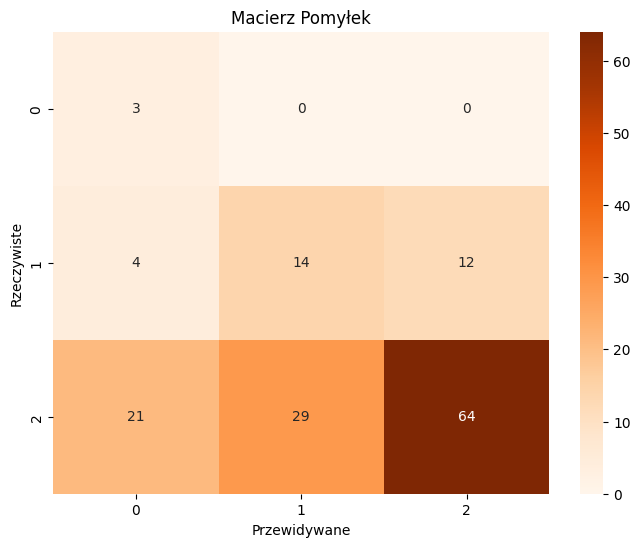

In [64]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.title('Macierz Pomyłek')
plt.show()